<a href="https://colab.research.google.com/github/kikeCastro01/RedNeuronalClasificacion/blob/main/Sem7y8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo CSV en Google Drive
file_path = '/content/drive/My Drive/Obesity Classification.csv'

# Cargar el conjunto de datos en un DataFrame de Pandas
data = pd.read_csv(file_path)

# Visualizar las primeras filas del DataFrame
print(data.head())

Mounted at /content/drive
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [ ]:
# Eliminar algunas columnas del DataFrame (por ejemplo, las columnas 'columna1' y 'columna2')
columnas_a_eliminar = ['ID', 'Gender']
data_limpia = data.drop(columnas_a_eliminar, axis=1)

# Guardar el nuevo DataFrame como un archivo CSV en el entorno de Colab
ruta_guardado = 'datos_limpios.csv'
data_limpia.to_csv(ruta_guardado, index=False)

print("Archivo CSV guardado exitosamente como 'datos_limpios.csv' en el entorno de Colab.")


Archivo CSV guardado exitosamente como 'datos_limpios.csv' en el entorno de Colab.


Normal Weight: 0
Obese: 1
Overweight: 2
Underweight: 3
Epoch 1/2400
3/3 [==============================] - 2s 110ms/step - loss: 75.6459 - accuracy: 0.1047 - val_loss: 76.4453 - val_accuracy: 0.1364
Epoch 2/2400
3/3 [==============================] - 0s 17ms/step - loss: 72.0455 - accuracy: 0.1047 - val_loss: 72.7512 - val_accuracy: 0.1364
Epoch 3/2400
3/3 [==============================] - 0s 16ms/step - loss: 68.4794 - accuracy: 0.1047 - val_loss: 69.0737 - val_accuracy: 0.1364
Epoch 4/2400
3/3 [==============================] - 0s 16ms/step - loss: 64.9341 - accuracy: 0.1047 - val_loss: 65.4436 - val_accuracy: 0.1364
Epoch 5/2400
3/3 [==============================] - 0s 17ms/step - loss: 61.5227 - accuracy: 0.1047 - val_loss: 61.8430 - val_accuracy: 0.1364
Epoch 6/2400
3/3 [==============================] - 0s 27ms/step - loss: 58.1256 - accuracy: 0.1047 - val_loss: 58.3080 - val_accuracy: 0.1364
Epoch 7/2400
3/3 [==============================] - 0s 17ms/step - loss: 54.7808 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


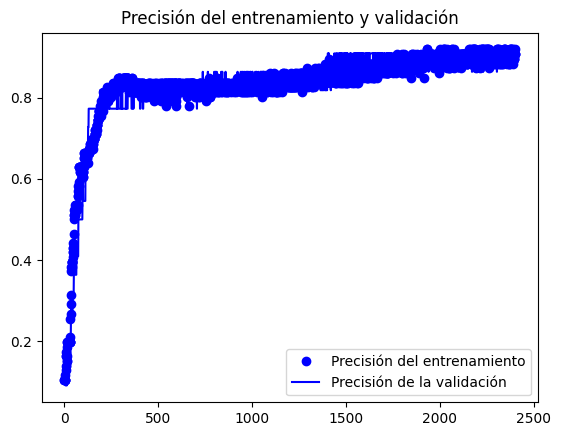

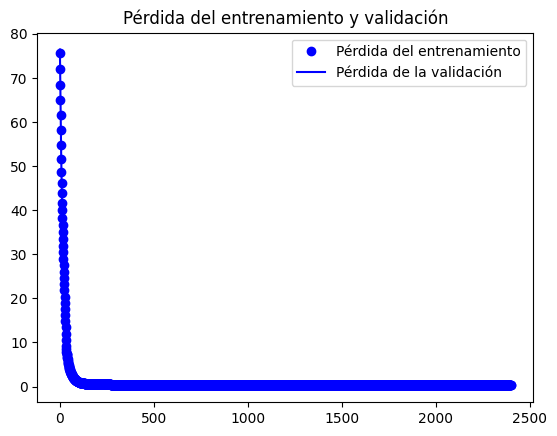

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt


# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_limpios.csv')

# Convertir las etiquetas de clase a valores numéricos
encoder = LabelEncoder()
data['Label'] = encoder.fit_transform(data['Label'])
# Asignar números a las etiquetas de clase como comentarios
for i, label in enumerate(encoder.classes_):
    print(f'{label}: {i}')
# Guardar el codificador
with open('encoder.pkl', 'wb') as f:
  pickle.dump(encoder, f)


# Dividir los datos en un conjunto de entrenamiento y un conjunto de validación
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
# test_size=0.2  =  20% del conjunto de datos se asigna al conjunto de prueba
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2)



# Crear la red neuronal MLP
model = Sequential() # Inicializar el modelo secuencial vacío

# Agregar la primera capa densa con 8 neuronas, función de activación ReLU y 4 características de entrada
model.add(Dense(8, input_dim=4, activation='relu'))

# Agregar una segunda capa densa con 8 neuronas y función de activación ReLU
model.add(Dense(8, activation='relu'))

# Agregar la capa de salida con 4 neuronas y función de activación softmax
model.add(Dense(4, activation='softmax'))



# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_data, tf.keras.utils.to_categorical(train_labels), epochs=2400, validation_data=(test_data, tf.keras.utils.to_categorical(test_labels)))

# Evaluar la precisión del modelo en los datos de entrenamiento y validación
train_accuracy = model.evaluate(train_data, tf.keras.utils.to_categorical(train_labels))[1]
test_accuracy = model.evaluate(test_data, tf.keras.utils.to_categorical(test_labels))[1]
print(f'Precisión del entrenamiento: {train_accuracy}')
print(f'Precisión de la validación: {test_accuracy}')

# Guardar el modelo
model.save('modelo.h5')

# Convertir el modelo a formato tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Guardar el modelo en formato tflite
with open('modelo.tflite', 'wb') as f:
    f.write(tflite_model)

# Graficar la precisión y la pérdida durante el entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Precisión del entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de la validación')
plt.title('Precisión del entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Pérdida del entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Pérdida del entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
from keras.models import load_model

# Cargar el modelo
model = load_model('modelo.h5')

# Definir la entrada del usuario

entrada = pd.DataFrame({'Age': [27.0], 'Height': [177.0], 'Weight': [82.0], 'BMI': [26.2]}) # Normal Weight
#entrada = pd.DataFrame({'Age': [50.0], 'Height': [190.0], 'Weight': [105.5], 'BMI': [33.7]})# Obese
#entrada = pd.DataFrame({'Age': [36.0], 'Height': [182.0], 'Weight': [91.5], 'BMI': [27.8]}) # Overweight
#entrada = pd.DataFrame({'Age': [23.0], 'Height': [162.0], 'Weight': [46.2], 'BMI': [17.9]}) # Underweight

# Hacer una predicción
prediccion = model.predict(entrada)

print ("prediccion = ", prediccion)

# Imprimir la etiqueta de clase predicha
etiqueta_predicha = prediccion.argmax()

if etiqueta_predicha == 0:
    print('Normal Weight(Peso normal)')
elif etiqueta_predicha == 1:
    print('Obese(Obesidad)')
elif etiqueta_predicha == 2:
    print('Overweight(Sobrepeso)')
elif etiqueta_predicha == 3:
    print('Underweight(Peso bajo)')


1/1 [==============================] - 0s 130ms/step
prediccion =  [[1.2203457e-01 1.9216861e-09 8.2534207e-08 8.7796539e-01]]
Underweight(Peso bajo)


Análisis Descriptivo por Tipo de Peso:
                Age                                                        \
              count       mean        std   min    25%   50%   75%    max   
Label                                                                       
Normal Weight  29.0  42.275862  21.250036  16.0  26.00  35.0  53.0   92.0   
Obese          12.0  69.750000  23.653272  45.0  53.50  58.5  90.5  108.0   
Overweight     20.0  59.750000  23.743974  29.0  42.75  54.5  67.5  112.0   
Underweight    47.0  37.659574  21.714828  11.0  21.50  31.0  49.0  103.0   

              Height              ...  Weight          BMI             \
               count        mean  ...     75%    max count       mean   
Label                             ...                                   
Normal Weight   29.0  166.724138  ...   75.00   80.0  29.0  22.834483   
Obese           12.0  203.333333  ...  111.25  120.0  12.0  32.341667   
Overweight      20.0  166.500000  ...   91.25   95.0  20

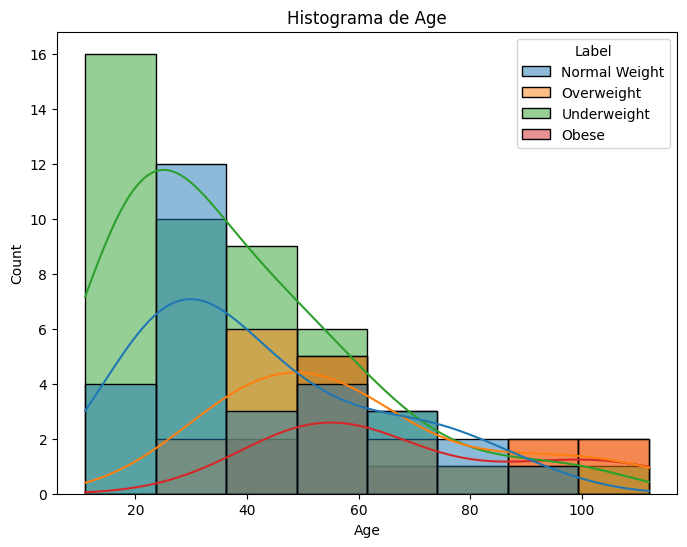

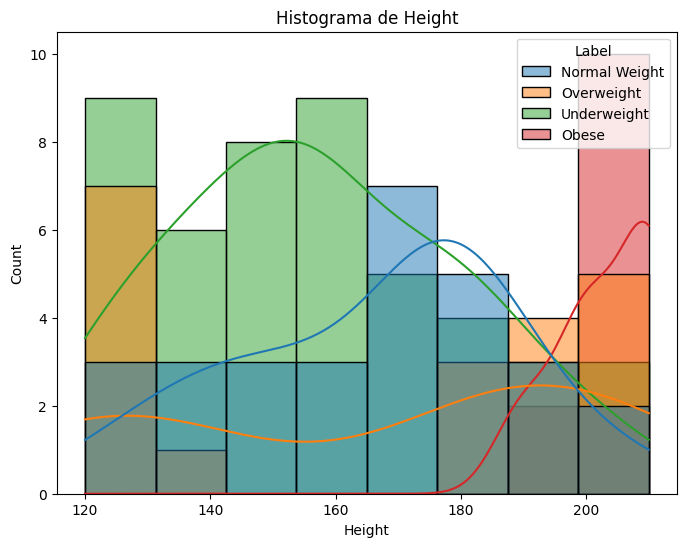

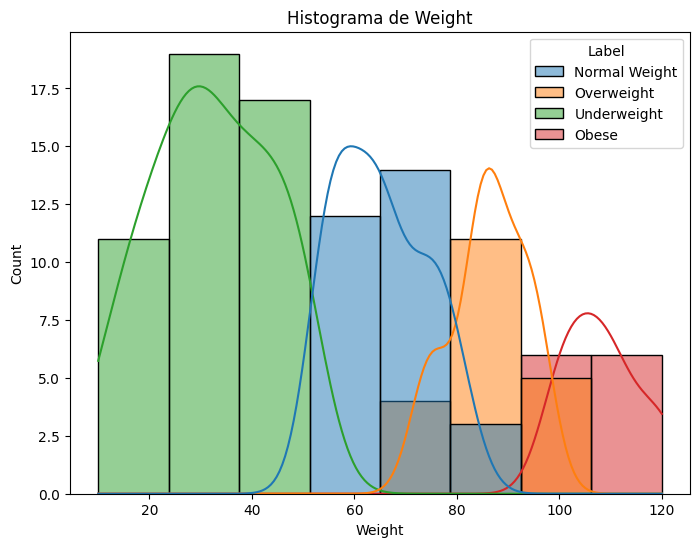

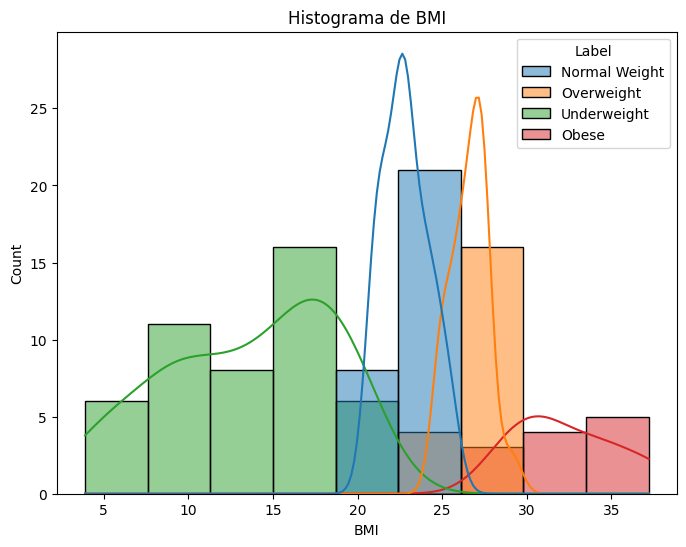

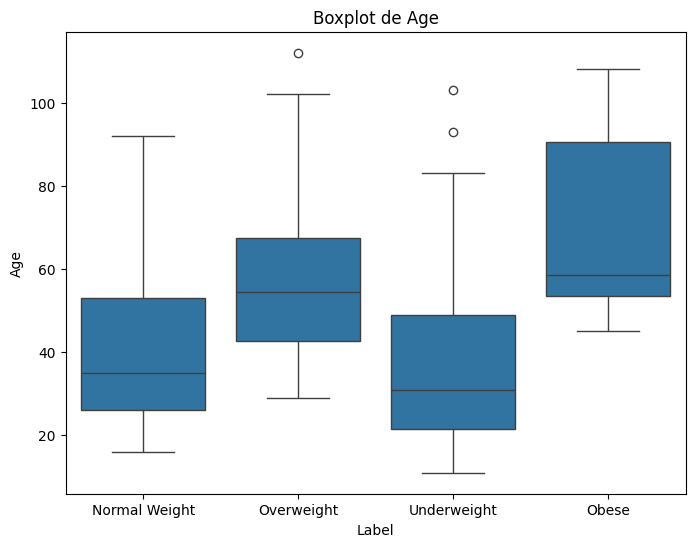

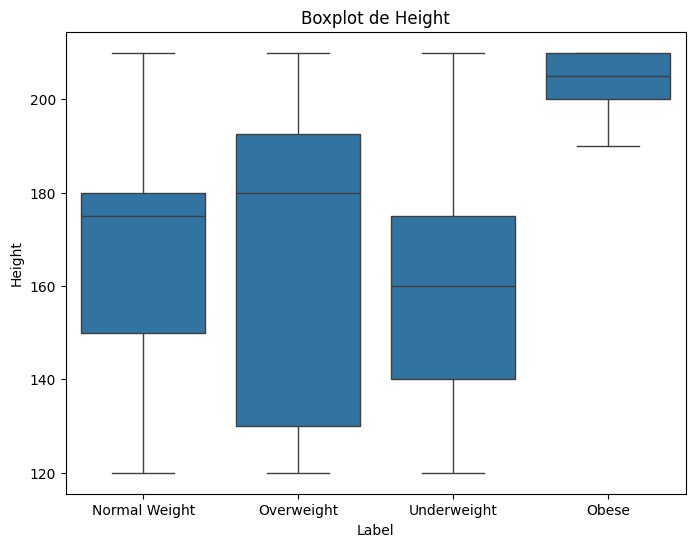

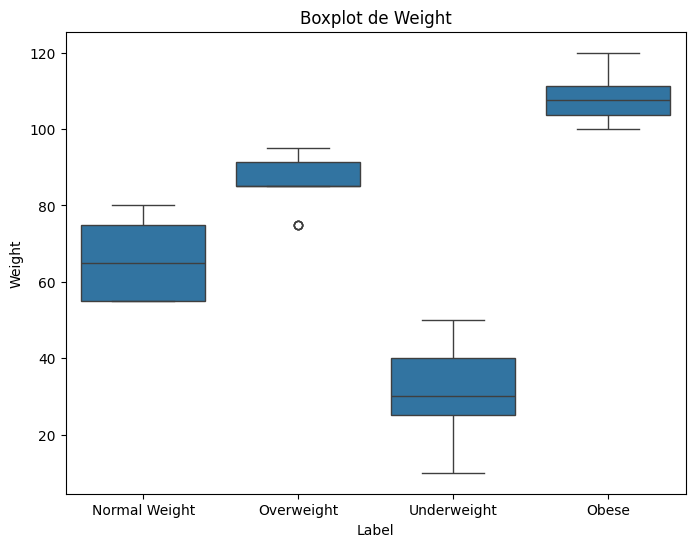

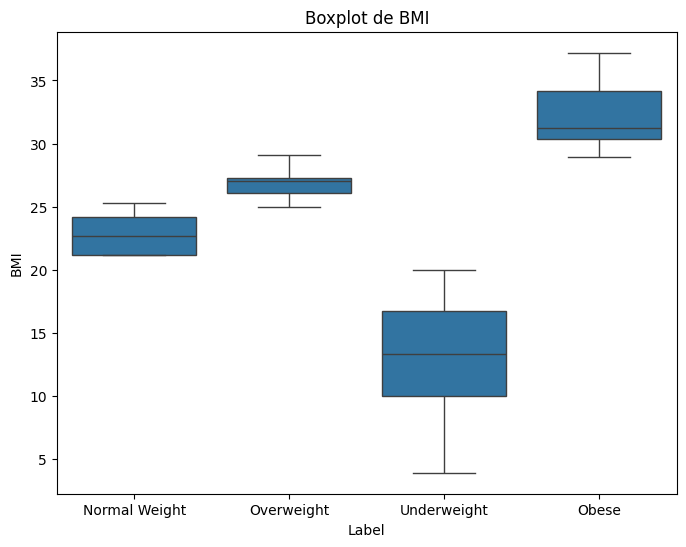

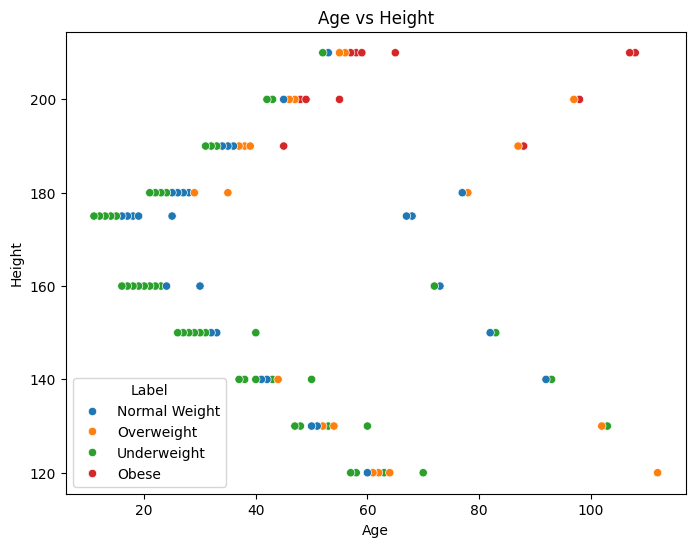

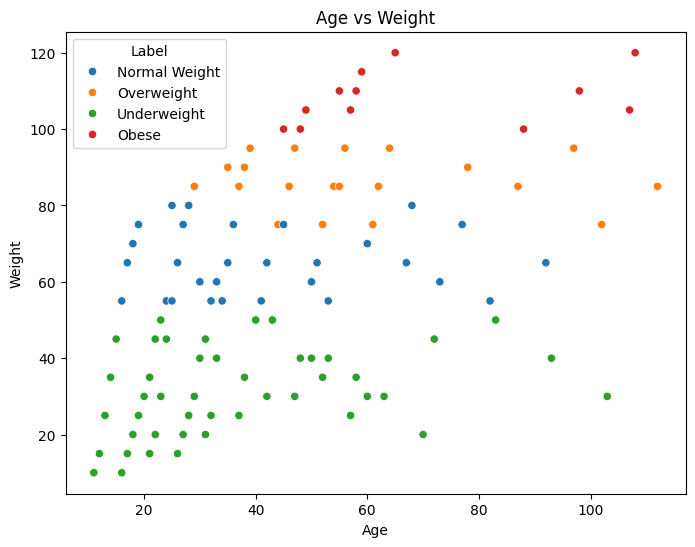

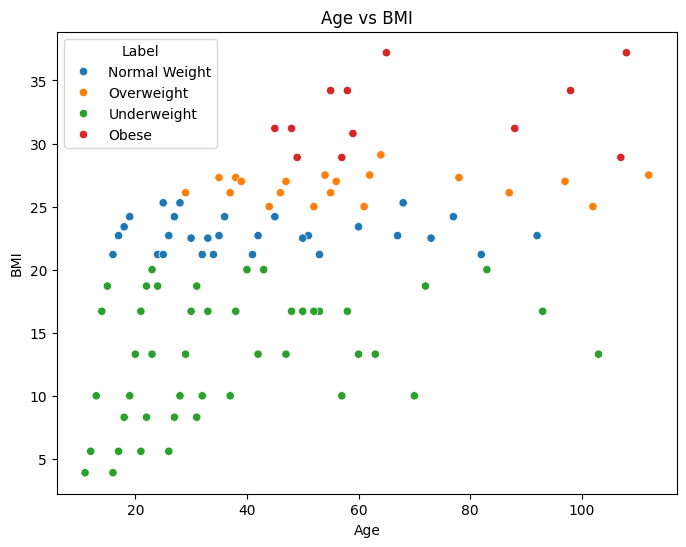

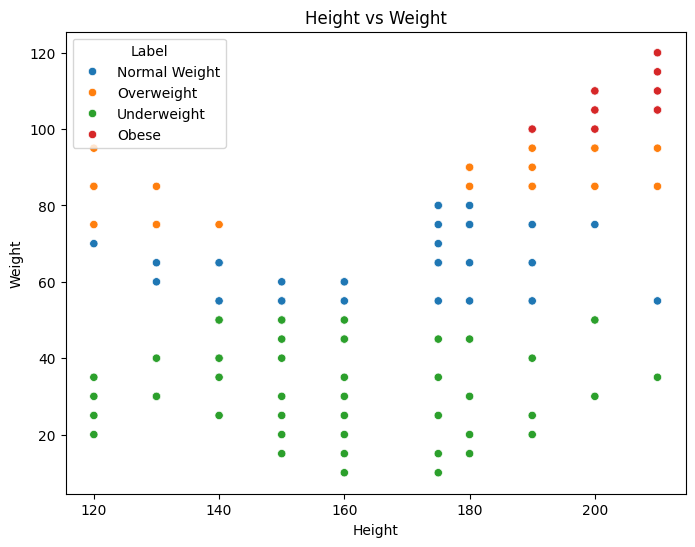

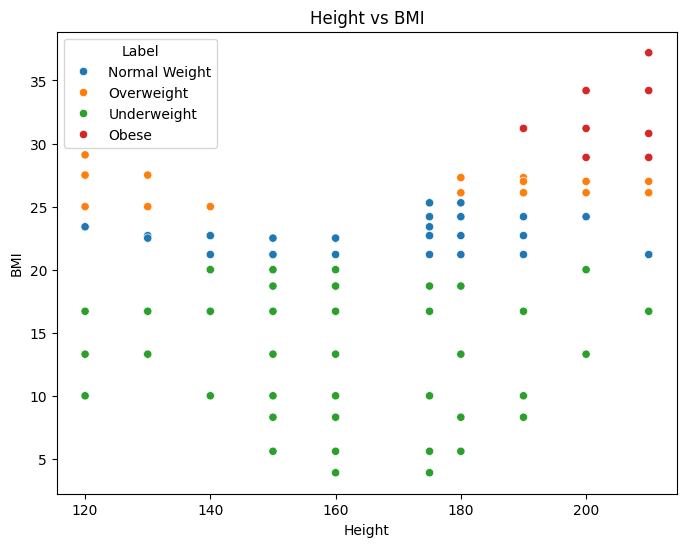

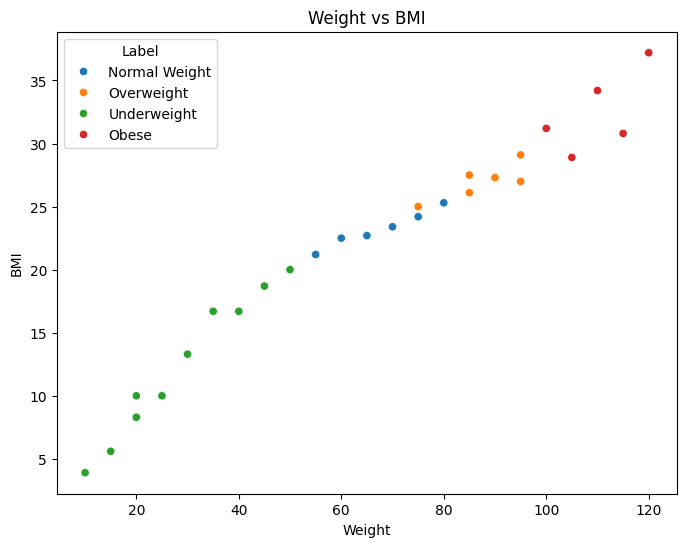

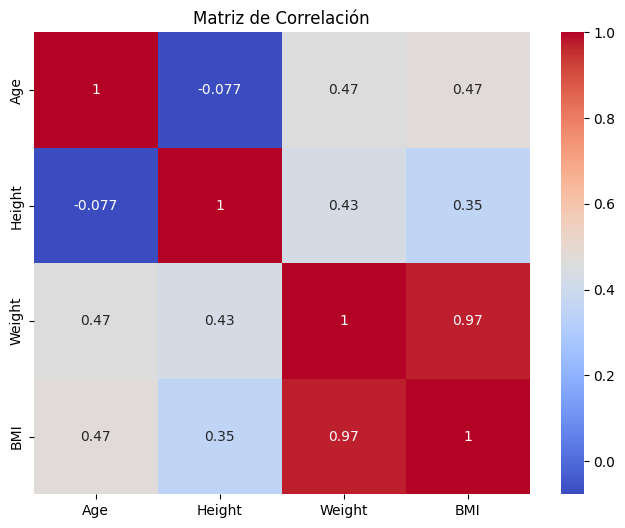

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import pickle

# Cargar los datos
data = pd.read_csv('datos_limpios.csv')

# Análisis Descriptivo
print("Análisis Descriptivo por Tipo de Peso:")
groups = data.groupby('Label')
print(groups.describe())

# Histogramas
for column in data.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data, x=column, hue="Label", kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()

# Box plots
for column in data.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Label', y=column, data=data)
    plt.title(f'Boxplot de {column}')
    plt.show()

# Scatter plots
features = data.columns[:-1]
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=features[i], y=features[j], hue='Label', data=data)
        plt.title(f'{features[i]} vs {features[j]}')
        plt.show()

# Correlaciones
correlation_matrix = data.drop(columns=['Label']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()